# Pymaceuticals Inc.
---

### Analysis

- Mice with the largest average tumor volume (mm3) were on Kepatril regimens, yet mice with the smallest average tumor volume (mm3) were on either Capomulin or Ramicane regimens.
- Since mice on either Capomulin or Ramicane were observed to have the smallest mean tumor volume, it can be assumed that both are very effective, and perhaps interchangable because of their similar effects in tumor volume. According to the boxplots, they are also signficantly more effective than Infubinol and Cefamin.
- The correlation between mouse weight (g) and average tumor volume (mm3) is 0.84, meaning that mouse weight (g) and average tumor volue (mm3) have a strong, positive correlation. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

combined_data = combined_data.sort_values(['Timepoint','Tumor Volume (mm3)'])
combined_data.reset_index(drop=True, inplace=True)

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = combined_data['Mouse ID'].nunique()
number_mice

249

In [3]:
combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

unique = []
dup = []

for i in range(0,250):
    if combined_data['Mouse ID'][i] not in unique:
        unique.append(combined_data['Mouse ID'][i])
    else: 
        dup.append(combined_data['Mouse ID'][i])

dup_df = pd.DataFrame()
dup_df['Mouse ID']=dup

dup_df['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined_data[combined_data['Mouse ID'] == 'g989']
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
108,g989,0,45.000000,0,Propriva,Female,21,26
435,g989,5,47.570392,0,Propriva,Female,21,26
469,g989,5,48.786801,0,Propriva,Female,21,26
661,g989,10,49.880528,0,Propriva,Female,21,26
697,g989,10,51.745156,0,Propriva,Female,21,26
847,g989,15,51.325852,1,Propriva,Female,21,26
892,g989,15,53.442020,0,Propriva,Female,21,26
1066,g989,20,54.657650,1,Propriva,Female,21,26
1079,g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data.loc[(combined_data['Mouse ID'] != 'g989')]
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
combined_data['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
stats_summary = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': variance, 
                              'Tumor Volume Std. Dev.': stdev, 'Tumor Volume Std. Err.': SEM})
stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
# Using the aggregation method, produce the same summary statistics in a single line
combined_data.groupby("Drug Regimen").agg(aggregations)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

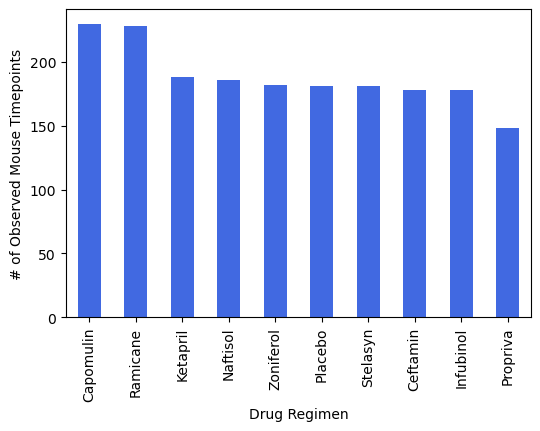

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows = combined_data.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

#Create a bar plot
plt.figure(figsize=(6,4))
ax = rows.plot(kind='bar', color='royalblue')

#Establish title and axes labels for the bar plot
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')

#Set the x-tick labels to drug reminen names
ax.set_xticklabels(rows.index.tolist())

#Show bar plot
plt.show()

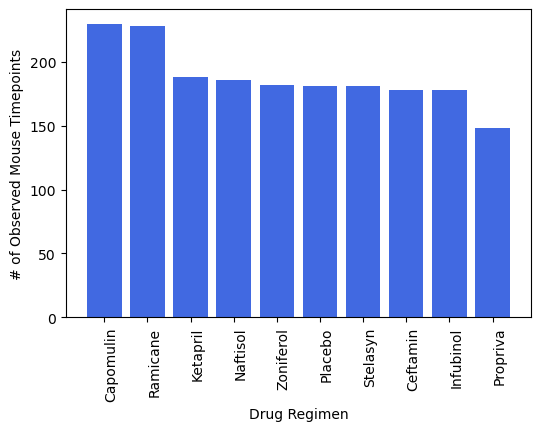

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
rows = combined_data.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

#Create a bar plot
plt.figure(figsize=(6,4))
plt.bar(x=rows.index, height=rows, color='royalblue')

#Establish title and axes labels for the bar plot
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#Set the x-tick labels to drug reminen names
plt.xticks(rotation=90, ha='left')

#Show bar plot
plt.show()

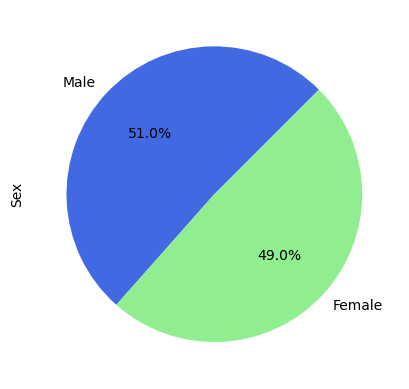

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_sex = combined_data['Sex'].value_counts()

# Create pie chart
count_sex.plot(kind='pie', autopct='%1.1f%%', startangle = 45, colors= ['royalblue', 'lightgreen'])

#Establish the plot title
plt.ylabel('Sex')

#Show pie chart
plt.show()

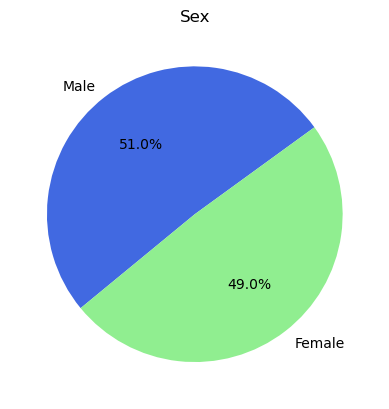

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Establish values for pie chart
count_sex = combined_data['Sex'].value_counts()

#The colors of each section of the pie chart
colors = ['royalblue', 'lightgreen']

#Create pie chart based on above
plt.pie(count_sex, labels= count_sex.index, autopct='%1.1f%%', startangle = 36, colors= ['royalblue', 'lightgreen'])

#Establish the plot title
plt.title('Sex')

#Show pie chart
plt.show()

## Quartiles, Outliers and Boxplots

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


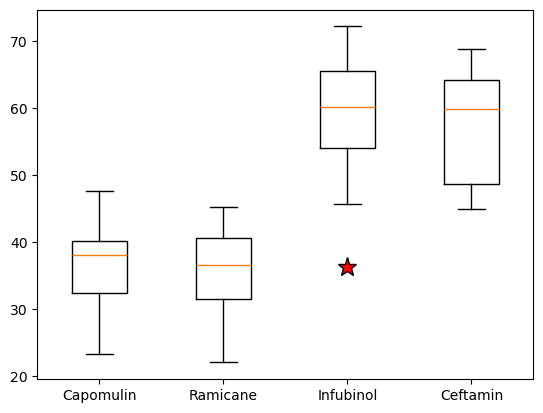

In [14]:
tumor_df = combined_data.groupby('Mouse ID').\
            Timepoint.max().reset_index().\
            merge(combined_data,on=['Mouse ID','Timepoint'])

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_list = []
for drug in drugs:
    tumor = tumor_df[tumor_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumor_list.append(tumor)

    iqr = tumor.quantile(.75) - tumor.quantile(.25)
    lower = tumor.quantile(.25) - 1.5*iqr
    upper = tumor.quantile(.75) + 1.5*iqr

    print(f"{drug}'s potential outliers: {tumor[(tumor<lower)|(tumor>upper)]}")

plt.boxplot(tumor_list, labels=drugs, flierprops={'marker': '*', 'markersize': 14, 'markerfacecolor': 'red'});

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Find the max value in the column
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = combined_data.groupby('Mouse ID').\
            Timepoint.max().reset_index().\
            merge(combined_data,on=['Mouse ID','Timepoint'])

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = tumor_df[tumor_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumor_list.append(tumor)
    
    # add subset 
    iqr = tumor.quantile(.75) - tumor.quantile(.25)
    lower = tumor.quantile(.25) - 1.5*iqr
    upper = tumor.quantile(.75) + 1.5*iqr
    
    # Determine outliers using upper and lower bounds
    print(f"{drug}'s potential outliers: {tumor[(tumor<lower)|(tumor>upper)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


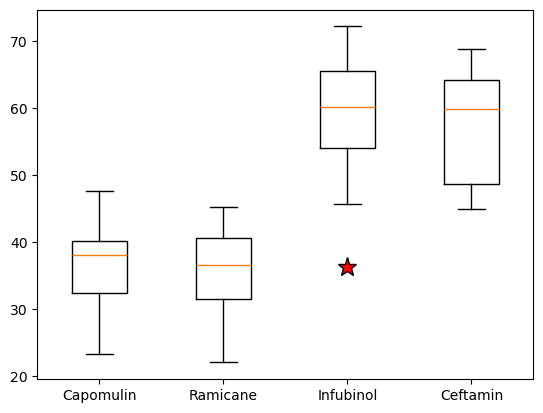

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_list, labels=drugs, flierprops={'marker': '*', 'markersize': 14, 'markerfacecolor': 'red'});

## Line and Scatter Plots

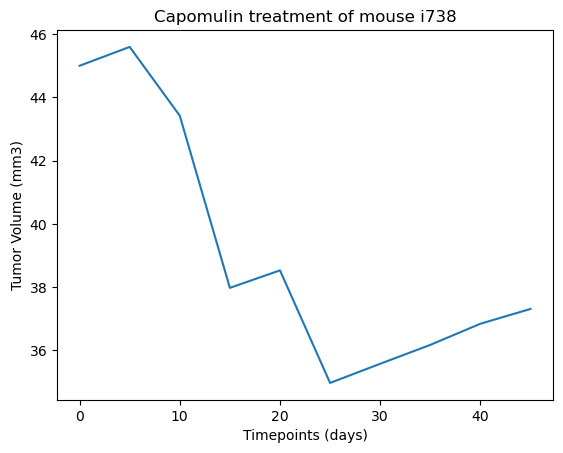

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
cap_count = capomulin['Mouse ID'].value_counts()
top_mouse = cap_count.index[10]
mouse_cap = capomulin[capomulin['Mouse ID'] == top_mouse]

plt.plot(mouse_cap['Timepoint'], mouse_cap['Tumor Volume (mm3)'])

plt.title(f'Capomulin treatment of mouse {top_mouse}')
plt.xlabel('Timepoints (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

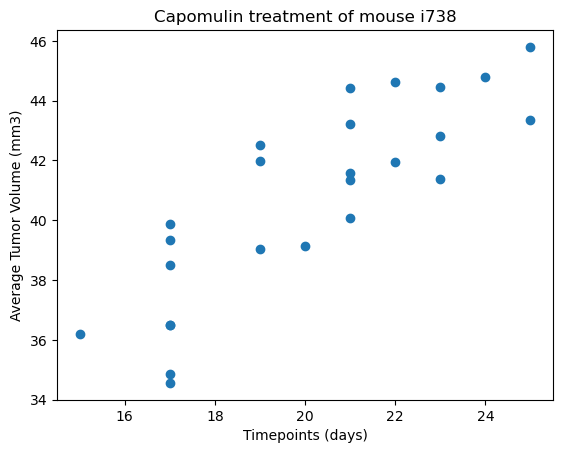

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_grouped = capomulin.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse {top_mouse}')
plt.xlabel('Timepoints (days)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


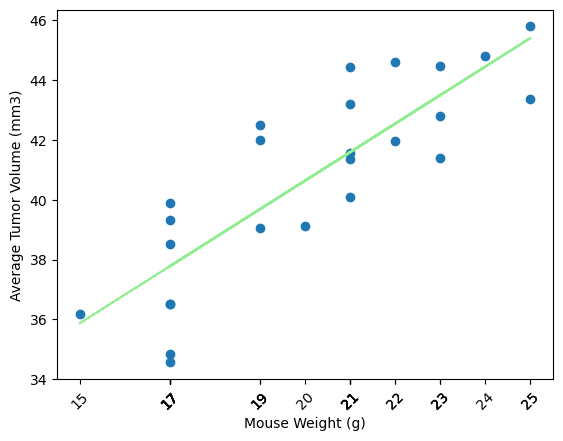

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr_coef = st.pearsonr(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

d_slope, d_int, rvalue, pvalue, stderr = st.linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

d_fit = d_slope * capomulin_grouped['Weight (g)'] + d_int

plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
plt.plot(capomulin_grouped['Weight (g)'], d_fit, '--', color = 'lightgreen')
plt.xticks(capomulin_grouped['Weight (g)'], rotation=45)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coef[0],2)}")

plt.show()